# Chapter 2. Statistical Learning

## Applied Exercises

### Exercise 8: The College data set 

The **college** data set contains demographic characteristics, tuition, and more for USA colleges. The data set, which can be found in the file `College.csv`, contains a number of variables for 777 different universities and colleges in the US.

**Variable** | **Description**
:- | :-
**Private** | Public/private indicator
**Apps** | Number of applications received
**Accept** | Number of applicants accepted
**Enroll** | Number of new students enrolled
**Top10perc** | New students from top 10 % of high school class
**Top25perc** | New students from top 25 % of high school class
**F.Undergrad** | Number of full-time undergraduates
**P.Undergrad** | Number of part-time undergraduates
**Outstate** | Out-of-state tuition
**Room.Board** | Room and board costs
**Books** | Estimated book costs
**Personal** | Estimated personal spending
**PhD** | Percent of faculty with Ph.D.’s
**Terminal** | Percent of faculty with terminal degree
**S.F.Ratio** | Student/faculty ratio
**perc.alumni** | Percent of alumni who donate
**Expend** | Instructional expenditure per student
**Grad.Rate** | Graduation rate

In [1]:
college <- read.csv("data/College.csv")
rownames(college) <- college[, 1]
college <- college[, -1]
head(college)

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

#### Exercise 8a 

Use the `summary()` function to produce a numerical summary of the variables in the data set.

**Note:** to fit better in this notebook, I will print summary by groups of columns.

In [2]:
for (i in list(1, 2:5, 5:8, 11:14, 15:18)) print(summary(college[, i]))

 No Yes 
212 565 
      Apps           Accept          Enroll       Top10perc    
 Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
 Median : 1558   Median : 1110   Median : 434   Median :23.00  
 Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
 3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
 Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
     Books           Personal         PhD            Terminal    

There’s way more private universities than public universities.

#### Exercise 8b

Use the `pairs()`  function to produce a scatterplot matrix of the first ten columns or variables of the data.

**Note:** Whenever possible, I will use a package that I think it will be prettier or better.

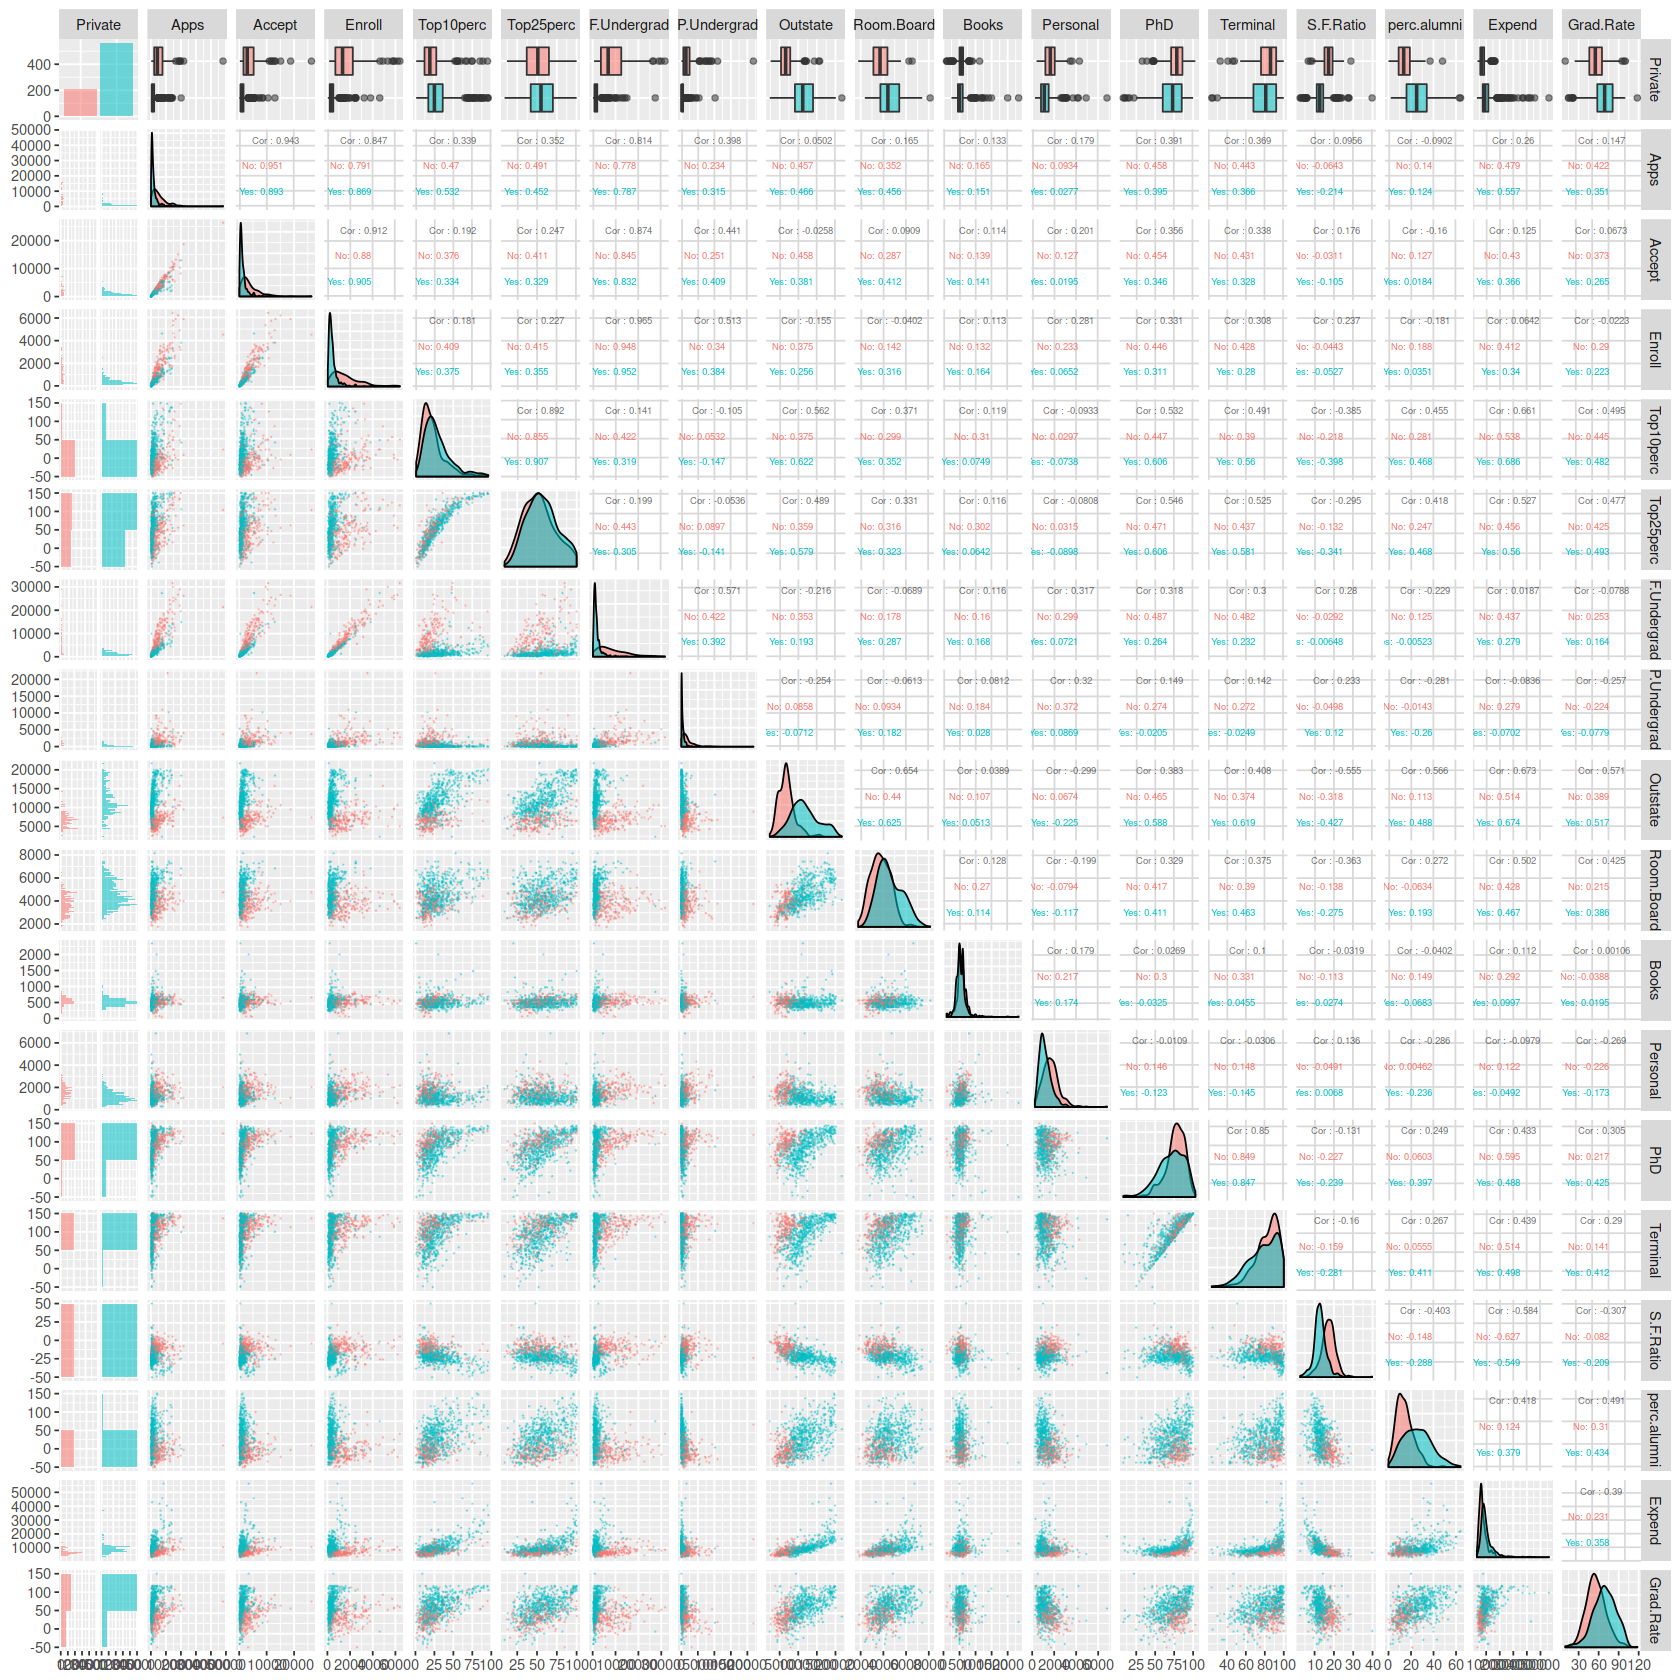

In [3]:
library("ggplot2")
library("GGally")
library("repr")

options(repr.plot.width = 14, repr.plot.height = 14)

ggpairs(
    college, 
    aes(colour = Private, alpha = 0.4), 
    lower = list(
        combo = wrap("facethist", binwidth = 100), 
        continuous = wrap("points", alpha = 0.3, size = 0.1)), 
    upper = list(
        continuous = wrap("cor", size = 2)))

There are more full-time undergraduates in public schools than in private schools. Curiously, the estimate personal spending seems a bit higher for public students.

#### Exercise 8c

Use the `plot()` function to produce side-by-side box plots of **Outstate** versus **Private**.

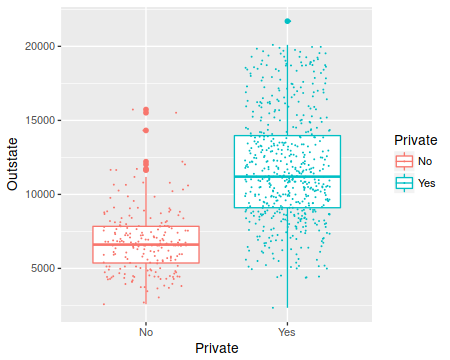

In [4]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 90)

ggplot(college, aes(Private, Outstate, colour = Private)) +
    geom_boxplot() + 
    geom_jitter(width = 0.3, size = 0.1)

#### Exercise 8d

Create a new qualitative variable, called **Elite**, by binning the **Top10perc** variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%. Use the `summary()` function to see how many elite universities there are.

In [5]:
Elite <- rep("No", nrow(college))
Elite[college$Top10perc >= 50] <- "Yes"
Elite <- as.factor(Elite)
college <- data.frame(college, Elite)
summary(Elite)

No Yes 
694  83

Now use the `plot()` function to produce side-by-side boxplots of **Outstate** versus **Elite**.

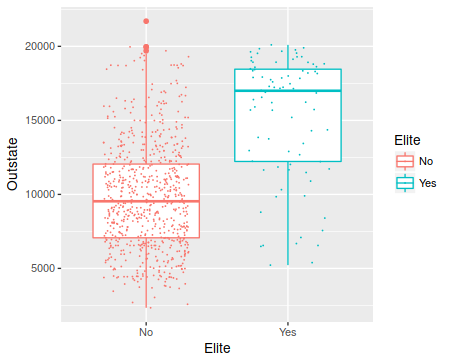

In [6]:
ggplot(college, aes(Elite, Outstate, colour = Elite)) + 
    geom_boxplot() + 
    geom_jitter(width = 0.3, size = 0.01)

#### Exercise 8e

Use the `hist()` function to produce some histograms with differing numbers of bins for a few of the quantitative variables.

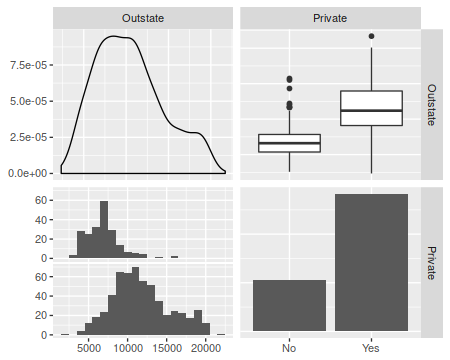

In [7]:
ggpairs(
    college, 
    columns = c("Outstate", "Private"),
    lower = list(
        combo = wrap("facethist", binwidth = 1000)))

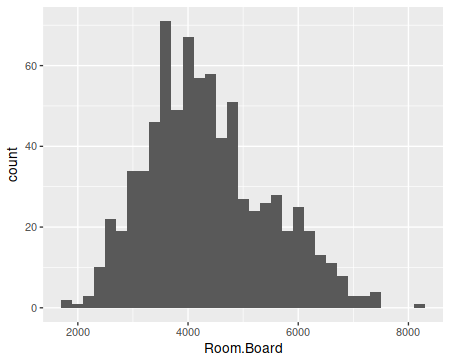

In [8]:
ggplot(college, aes(Room.Board)) + geom_histogram(binwidth = 200)

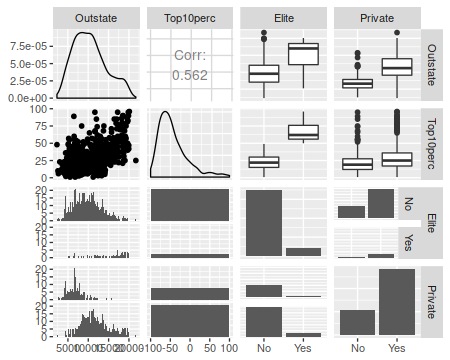

In [9]:
ggpairs(
    college[, c("Outstate", "Top10perc", "Elite", "Private")], 
    lower = list(
        combo = wrap("facethist", binwidth = 200)))

I don’t understand what is a Out-of-state private tuition. Does the value of 
out-of-state tuition actually mean the private tuition cost?

The **Elite** universities have higher out-of-state tuitions, which is expected.

Let’s see the number of applications that were sent, accepted and the final number of new students.

Also, we will compute the percentage of applications that were accepted, and the same for new students enrolled.

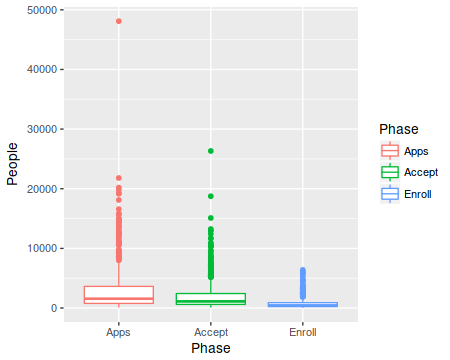

In [10]:
library("reshape2")

college$AcceptPerc <- college$Accept / college$Apps
college$EnrollPerc <- college$Enroll / college$Apps

view <- melt(
    cbind(
        row.names(college), 
        college[, c("Apps", "Accept", "Enroll")]),
    id.vars = 1)
colnames(view) <- c("University", "Phase", "People")

ggplot(view, aes(Phase, People, colour = Phase)) + geom_boxplot() 

There is a single university with almost 50k applications. Let’s see which one it is.array

In [11]:
famous.university <- college[which.max(college$Apps), ]
famous.university

Private Apps  Accept Enroll Top10perc Top25perc
Rutgers at New Brunswick No      48094 26330  4520   36        79       
                         F.Undergrad P.Undergrad Outstate Room.Board ...
Rutgers at New Brunswick 21401       3712        7410     4748       ...
                         Personal PhD Terminal S.F.Ratio perc.alumni Expend
Rutgers at New Brunswick 2009     90  95       19.5      19          10474 
                         Grad.Rate Elite AcceptPerc EnrollPerc
Rutgers at New Brunswick 77        No    0.5474695  0.09398262

It is a public university, with a low **Top10perc**. Let’s draw the boxplots again with horizontal lines marking this specific observation in each boxplot.

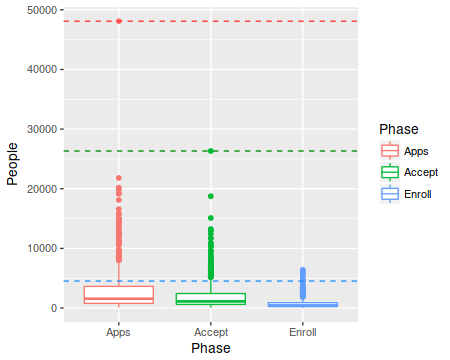

In [12]:
ggplot(view, aes(Phase, People, colour = Phase)) + 
    geom_boxplot() +
    geom_hline(yintercept = famous.university$Apps, 
               linetype = "dashed", color = "firebrick1") +
    geom_hline(yintercept = famous.university$Accept, 
               linetype = "dashed", color = "green4") +
    geom_hline(yintercept = famous.university$Enroll, 
               linetype = "dashed", color = "dodgerblue1")

Let’s plot the percentage of applications that were accepted, and the same for new students enrolled.

We will add the same horizontal lines marking where **Rutgers at New Brunswick** is located.

AcceptPerc EnrollPerc
Rutgers at New Brunswick 0.55       0.09

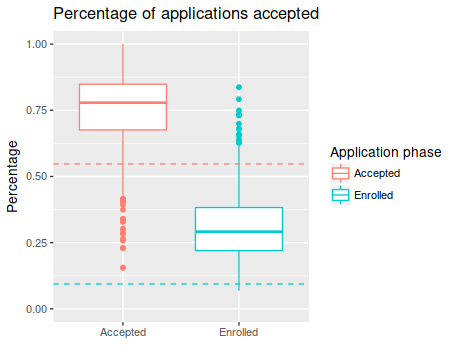

In [13]:
view <- melt(
    cbind(
        row.names(college), 
        college[, c("AcceptPerc", "EnrollPerc")]),
    id.vars = 1)
colnames(view) <- c("University", "Phase", "People")

ggplot(view, aes(Phase, People, colour = Phase)) + 
    geom_boxplot() +
    geom_hline(
        yintercept = famous.university$AcceptPerc, 
        linetype = "dashed", 
        color = "salmon") +
    geom_hline(
        yintercept = famous.university$EnrollPerc, 
        linetype = "dashed", 
        color = "#00cccc") +
    scale_y_continuous(limit = c(0, 1)) +
    scale_x_discrete(labels = c("Accepted", "Enrolled")) +
    scale_colour_manual(
        values = c("salmon", "#00cccc"),
        labels = c("Accepted", "Enrolled")) +
    labs(title = "Percentage of applications accepted",
         x = "", 
         y = "Percentage",
         colour = "Application phase")

round(famous.university[, c("AcceptPerc", "EnrollPerc")], 2)

Out of the almost 49k application **Rutgers at New Brunswick** has received, 50% was accepted, and only 10% of the total students actually enrolled.

### Exercise 9: The Auto data set

The **Auto MPG** data set has gas mileage, horsepower, and other information for cars.

*“The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.”* (Quinlan, 1993)

Make sure that the missing values have been removed from the data.

In [14]:
auto <- read.csv("data/Auto.csv", header = TRUE, na.strings = "?")
cat("Dimensions:", dim(auto), "—",
    "without missings:", dim(na.omit(auto)), "\n")
auto <- na.omit(auto)
rownames(auto) <- paste(auto$name, rownames(auto))
auto <- auto[, -ncol(auto)]
head(auto)

Dimensions: 397 9 — without missings: 392 9 


mpg cylinders displacement horsepower weight
chevrolet chevelle malibu 1 18  8         307          130        3504  
buick skylark 320 2         15  8         350          165        3693  
plymouth satellite 3        18  8         318          150        3436  
amc rebel sst 4             16  8         304          150        3433  
ford torino 5               17  8         302          140        3449  
ford galaxie 500 6          15  8         429          198        4341  
                            acceleration year origin
chevrolet chevelle malibu 1 12.0         70   1     
buick skylark 320 2         11.5         70   1     
plymouth satellite 3        11.0         70   1     
amc rebel sst 4             12.0         70   1     
ford torino 5               10.5         70   1     
ford galaxie 500 6          10.0         70   1

#### Exercise 9a

Which of the predictors are quantitative, and which are qualitative?

**Variable** | **Type** | **Description**
:- | :- | :-
**mpg** | continuous | Miles Per Gallon, the fuel efficiency
**cylinders** | multi-valued discrete | 
**displacement** | continuous | The volume of the car’s engine in cubic inches
**horsepower** | continuous | The rate at which mechanical energy is expended
**weight** | continuous | The car’s weight
**acceleration** | continuous | The car’s acceleration
**model year** | multi-valued discrete | Year of fabrication
**origin** | multi-valued discrete | 
**car name** | string | Not unique for each instance

#### Exercise 9b

What is the *range* of each quantitative predictor? You can answer this using the `range()` function.

In [15]:
apply(auto, 2, range)

mpg  cylinders displacement horsepower weight acceleration year origin
[1,]  9.0 3          68           46        1613    8.0         70   1     
[2,] 46.6 8         455          230        5140   24.8         82   3

#### Exercise 9c

What is the mean and standard deviation of each quantitative predictor?

In [16]:
library("dplyr")

mean.and.sd <- function(data) {
    data %>% 
        melt %>% 
        group_by(variable) %>% 
        summarise_all(funs(mean, sd)) %>% 
        mutate_at(vars(mean, sd), funs(round(., 1)))
}

mean.and.sd(auto)


Attaching package: ‘dplyr’

The following object is masked from ‘package:GGally’:

    nasa

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

No id variables; using all as measure variables


variable     mean   sd   
1 mpg            23.4   7.8
2 cylinders       5.5   1.7
3 displacement  194.4 104.6
4 horsepower    104.5  38.5
5 weight       2977.6 849.4
6 acceleration   15.5   2.8
7 year           76.0   3.7
8 origin          1.6   0.8

#### Exercise 9d

Now remove the 10<sup>th</sup> through 85<sup>th</sup> observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [17]:
mean.and.sd(auto[-{10:85}, ])

No id variables; using all as measure variables


variable     mean   sd   
1 mpg            24.4   7.9
2 cylinders       5.4   1.7
3 displacement  187.2  99.7
4 horsepower    100.7  35.7
5 weight       2936.0 811.3
6 acceleration   15.7   2.7
7 year           77.1   3.1
8 origin          1.6   0.8

#### Exercise 9e

Using the full data set, investigate the predictors graphically,
using scatter plots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

##### Paired plots

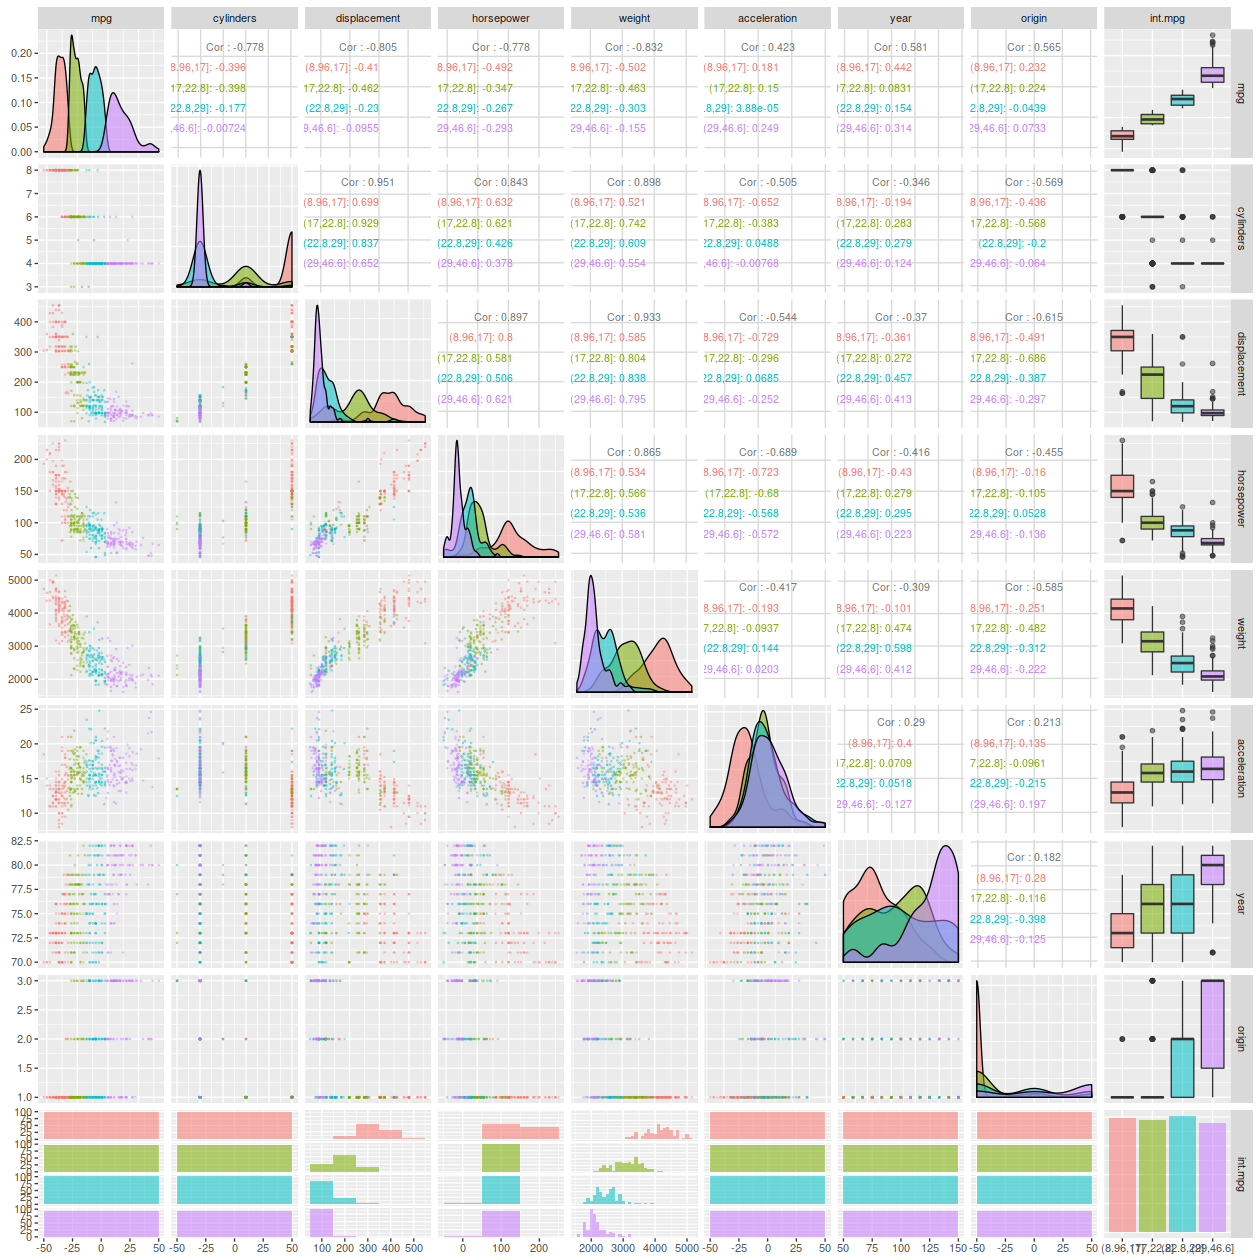

In [18]:
library("lsr")

options(repr.plot.width = 14, repr.plot.height = 14)

auto.pairs <- auto
auto.pairs$int.mpg <- quantileCut(auto.pairs$mpg, 4)

ggpairs(
    auto.pairs, 
    aes(alpha = 0.4, color = int.mpg),
    lower = list(
        combo = wrap("facethist", binwidth = 100), 
        continuous = wrap("points", alpha = 0.3, size = 0.4)), 
    upper = list(
        continuous = wrap("cor", size = 3)))

The higher the acceleration, the weight, and the horsepower, the less efficient the car is. As it consumes more fuel, the Miles Per Gallon decreases.

These features seem highly correlated to **MPG** measure. Let’s see the correlation matrix.

##### Correlation

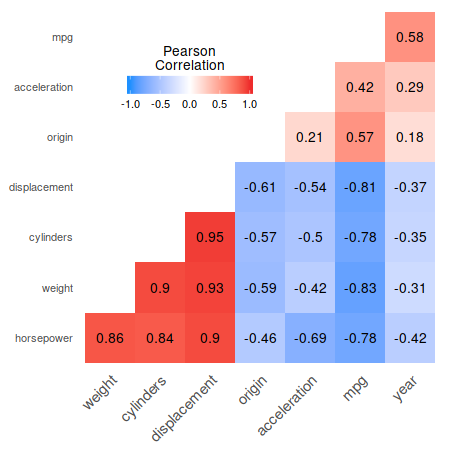

In [19]:
# Adapted from http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
options(repr.plot.width = 5, repr.plot.height = 5)

get.upper.tri <- function(mat) {
    mat[upper.tri(mat)] <- NA
    diag(mat) <- NA
    mat
}

# Use correlation between variables as distance
reorder.corr <- function(mat){
    dd <- as.dist((1 - mat) / 2)
    hc <- hclust(dd)
    cormat <- mat[hc$order, hc$order]
}

corr <- round(cor(auto), 2)
corr <- reorder.corr(corr)
corr <- get.upper.tri(corr)
corr <- melt(corr, na.rm = TRUE)

ggplot(data = corr, aes(x = Var1, y = Var2, fill = value, label = value)) + 
    geom_tile() + 
    scale_fill_gradient2(
        low = "dodgerblue", 
        high = "firebrick2", 
        mid = "white", 
        midpoint = 0, 
        limit = c(-1, 1), 
        space = "Lab",
        name = "Pearson\nCorrelation") + 
    theme(
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            size = 12, 
            hjust = 1)) + 
    coord_fixed() + 
    geom_text() + 
    theme(
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        axis.ticks = element_blank(), 
        legend.justification = c(1, 0), 
        legend.position = c(0.5, 0.7), 
        legend.direction = "horizontal") + 
    guides(
        fill = guide_colorbar(
            barwidth = 7, 
            barheight = 1, 
            title.position = "top", 
            title.hjust = 0.5))

As the years passed, the cars have gotten more efficient in general. But they not necessarily have decreased in size or power.


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



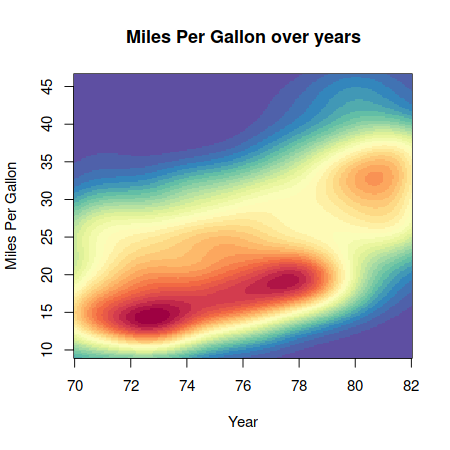

In [20]:
library("MASS")
library("RColorBrewer")

options(repr.plot.width = 5, repr.plot.height = 5)

rf <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
r <- rf(32)

k <- kde2d(auto$year, auto$mpg, n = 200)
image(k, col = r, xlab = "Year", ylab = "Miles Per Gallon")
title("Miles Per Gallon over years")

It seems the MPG doubled in a decade. Let’s confirm.

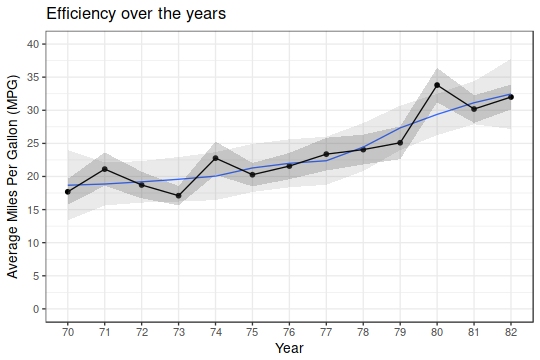

In [21]:
options(repr.plot.width = 6, repr.plot.height = 4)

by.year <- auto %>% 
    group_by(year) %>% 
    summarise(
        n = n(),
        mpg.mean = mean(mpg), 
        mpg.sd = sd(mpg))
by.year$mpg.min <- by.year$mpg.mean - 1.96 * by.year$mpg.sd / sqrt(by.year$n)
by.year$mpg.max <- by.year$mpg.mean + 1.96 * by.year$mpg.sd / sqrt(by.year$n)

ggplot(by.year, aes(year, mpg.mean)) + 
    theme_bw() +
    geom_point() +
    geom_smooth(method = "loess", size = 0.5, alpha = 0.2) +
    geom_line() + 
    geom_ribbon(aes(ymin = mpg.min, ymax = mpg.max), alpha = 0.2) +
    scale_y_continuous(limit = c(0, 40), breaks = seq(0, 40, 5)) +
    scale_x_discrete(limit = by.year$year) +
    scale_fill_manual(name="Bla",
        values=c(mpg.mean="#008B00")) +
    xlab("Year") +
    ylab("Average Miles Per Gallon (MPG)") +
    ggtitle("Efficiency over the years") 

Visually I would say the MPG increased by 10 gallons in a decade, from ~29 in 1970 to ~29 (the smooth line) in 1980. I prefer using the smooth line than the observed data because the average fell down in 1981.

(f) Suppose that we wish to predict gas mileage (**mpg**) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting **mpg**? Justify your answer.

Yes, the 1970s decade had a great improvement on the car engines and the plots suggest the specification of engines can predict the fuel efficiency.

### Exercise 10: The Boston data set

In [22]:
library("MASS")

data(Boston)

#### Exercise 10a

How many rows are in this data set? How many columns? What
do the rows and columns represent?

Description collected from the manual, `?Boston`. This a data set of housing values in Boston suburbs.

**Variable** | **Description**
:- | :-
**crim** | per capita crime rate by town.
**zn** | proportion of residential land zoned for lots over 25,000 sq.ft.
**indus** | proportion of non-retail business acres per town.
**chas** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
**nox** | $NO_x$, nitrogen oxides concentration (parts per 10 million).
**rm** | average number of rooms per dwelling.
**age** | proportion of owner-occupied units built prior to 1940.
**dis** | weighted mean of distances to five Boston employment centres.
**rad** | index of accessibility to radial highways.
**tax** | full-value property-tax rate per \$10,000.
**ptratio** | pupil-teacher ratio by town.
**black** | $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
**lstat** | lower status of the population (percent).
**medv** | median value of owner-occupied homes in \$1000s.


In [23]:
dim(Boston)

[1] 506  14

In [24]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

#### Exercise 10b

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

Let’s start discretizing the crime rate into four quantiles.

In [25]:
table(quantileCut(Boston$crim, 4))


(-0.0826,0.082]   (0.082,0.257]    (0.257,3.68]     (3.68,89.1] 
            127             126             126             127 

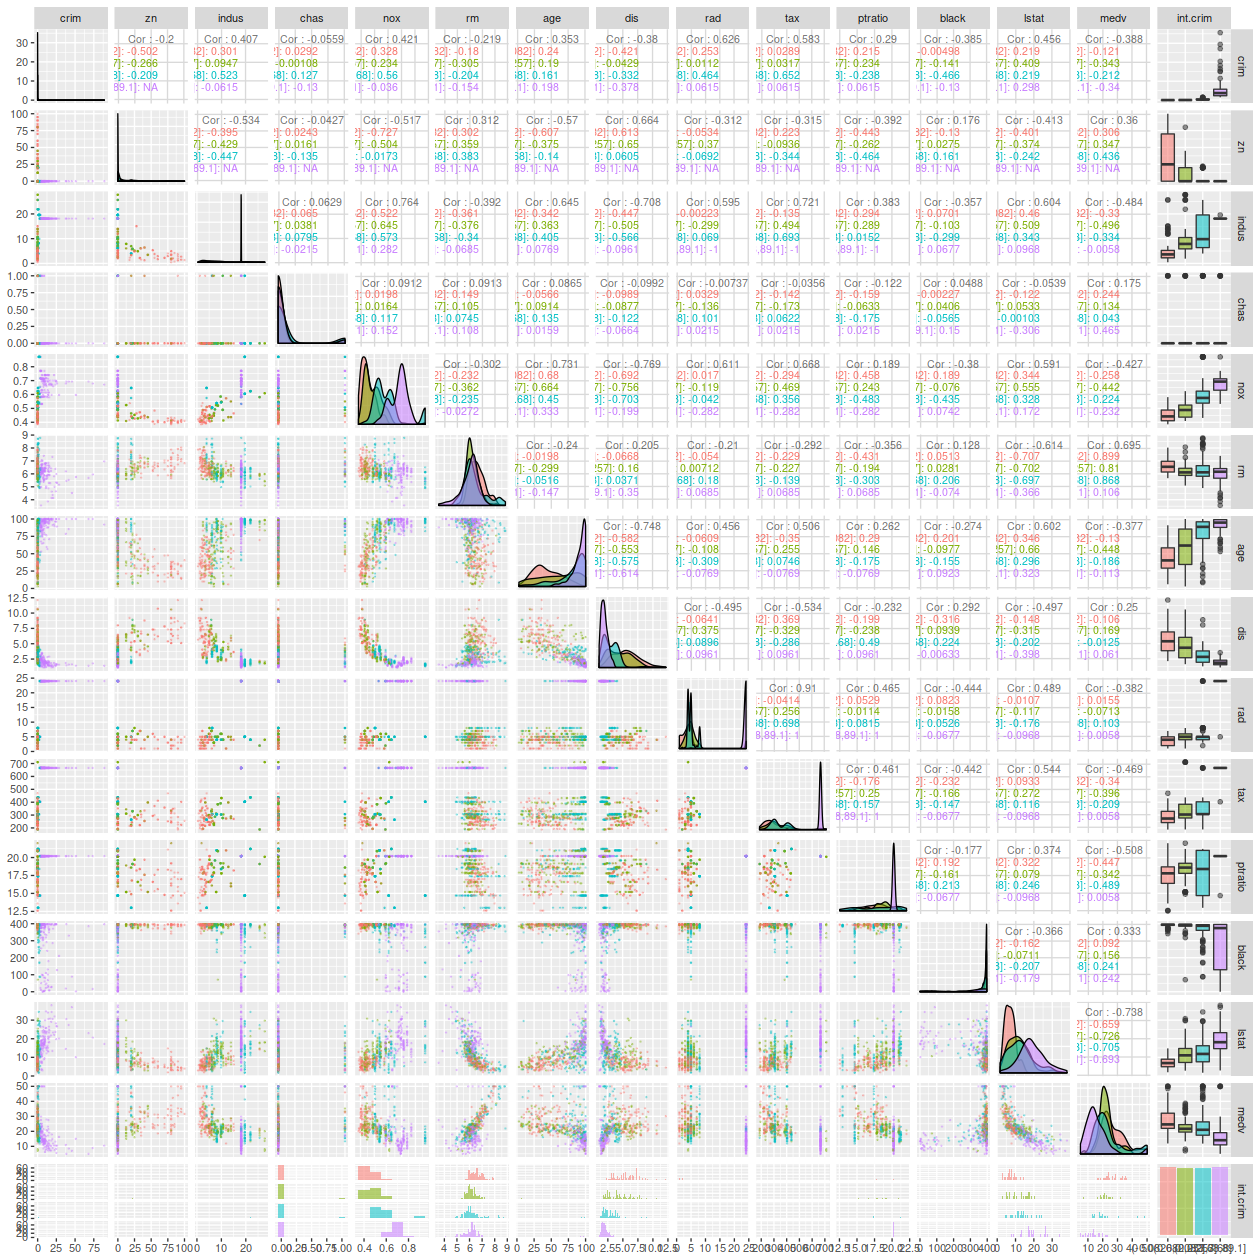

In [26]:
options(repr.plot.width = 14, repr.plot.height = 14)

boston.pairs <- Boston
boston.pairs$int.crim <- quantileCut(boston.pairs$crim, 4)

suppressWarnings(print(ggpairs(
    boston.pairs, 
    aes(alpha = 0.4, color = int.crim),
    lower = list(
        combo = wrap("facethist", binwidth = 0.1), 
        continuous = wrap("points", alpha = 0.3, size = 0.3)), 
    upper = list(
        continuous = wrap("cor", size = 3)))))

Lower status of population (**lstat**) and average number of rooms per dwelling (**rm**) are strongly correlated with the median value of owner-occupied homes in \$1000s (**medv**). Let’s visualize the correlation with the correlation matrix. 

It seems some features have many constant values. Let’s check this with a heat map of the values.

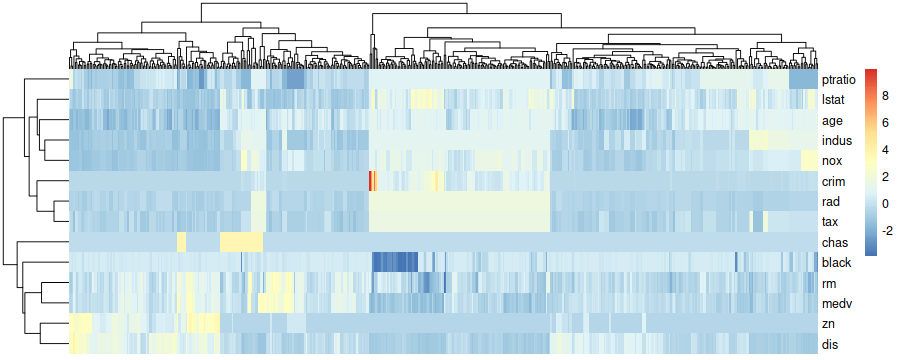

In [27]:
library("pheatmap")

options(repr.plot.width = 10, repr.plot.height = 4)

pheatmap(t(scale(Boston)), show_colnames = FALSE)

Indeed, the correlation dendrogram of columns above shows that some features 
have many constant values at the same time, implying the existance of colinear predictors. 

Note how the index of accessibility to radial highways (**rad**) and 
the full-value property-tax rate per \$10,000 (**tax**) have a constant value 
together. The pupil–teacher ration (**ptratio**) also seem to be constant at the same times —
observe the upper dendrogram of rows. However, **ptratio** 
is clustered way after (**rad**, **tax**) were.

Let’s see which values **rad** and **tax** assume.

In [28]:
library("IRdisplay")

display_markdown("##### rad")
summary(Boston$rad)
table(Boston$rad)

display_markdown("##### tax")
summary(Boston$tax)
tax.table <- table(Boston$tax)
tax.table[tax.table > 10]

display_markdown("##### ptratio")
summary(Boston$ptratio)
ptratio.table <- table(Boston$ptratio)
ptratio.table[ptratio.table > 10]

##### rad

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   9.549  24.000  24.000 


  1   2   3   4   5   6   7   8  24 
 20  24  38 110 115  26  17  24 132 

##### tax

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 


264 277 304 307 384 398 403 437 666 
 12  11  14  40  11  12  30  15 132 

##### ptratio

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 


  13 14.7 15.2 16.6 17.4 17.8 17.9 18.4 18.6 19.1 19.2 20.2 20.9   21 21.2 
  12   34   13   16   18   23   11   16   17   17   19  140   11   27   15 

It looks like when **rad** is 24, **tax** is 666. Let’s confirm and also get
the values for **ptratio**.

In [29]:
rad.rows <- Boston$rad == 24
tax.rows <- Boston$tax == 666
ptratio.rows <- Boston$ptratio == 20.2

cbind(apply(Boston[rad.rows, c("rad", "tax", "ptratio")], 2, summary),
      apply(Boston[tax.rows, c("rad", "tax", "ptratio")], 2, summary),
      apply(Boston[ptratio.rows, c("rad", "tax", "ptratio")], 2, summary))

rad tax ptratio rad tax ptratio rad      tax      ptratio
Min.    24  666 20.2    24  666 20.2     5.00000 224.0000 20.2   
1st Qu. 24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Median  24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Mean    24  666 20.2    24  666 20.2    22.91429 640.7429 20.2   
3rd Qu. 24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Max.    24  666 20.2    24  666 20.2    24.00000 666.0000 20.2

So, we know that if **rad** is 24, then **rad** is 666, and the other way around also holds.

We can also say that if **rad** is 24, then **ptratio** is 666, but the back is not true because there is at least a **rad** and **tax** with values 5 and 224 when **ptratio**  is 666.

Now we can have some initial insights (that need to be verified):

Regarding the median house values (**medv**):
- Houses with more rooms (**rm**) are more expensive (**medv**)
- Poorer areas (**lstat**) reduce the price of houses 
- Expensive houses have a lower tax rate, perhaps because the tax is limited to a value.
- The atmospheric chemistry (**nox**) is a measure of nitric oxide (NO) and nitrogen dioxide (NO2) in the area. Industrial areas of town centers can have a higher concentration, which is associated with a reduced price of houses. In fact, the proportion of non-retail business acres per town (**indus**) has a high correlation with **nox**.
- The pupil–teacher ratio by town (**ptarion**) seems to be related with **proportion of residential land zoned**

#### Exercise 10c

Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

Let’s plot the correlation matrix.

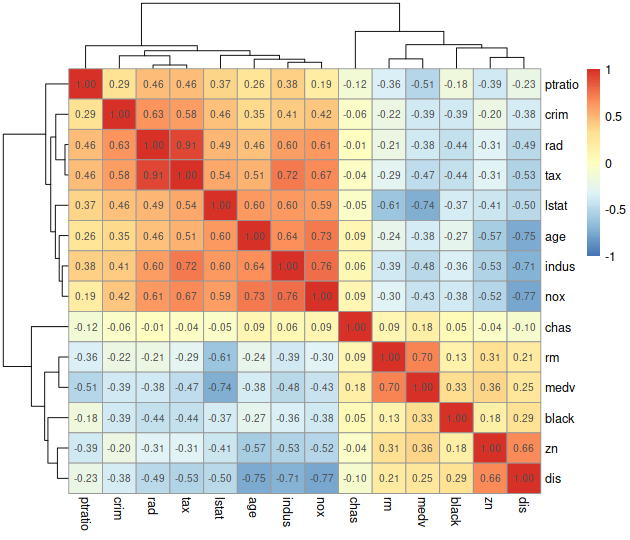

In [30]:
options(repr.plot.width = 7, repr.plot.height = 6)

pheatmap(cor(Boston, use="pairwise.complete.obs"), 
         display_numbers = TRUE,
         breaks = seq(-1, 1, 0.02))

These predictors seem to be related to the crime rate:

- Positive, higher than 0.3: **rad, tax, lstat, age, indus, nox**
- Negative, lower than -0.3: **medv, black, dis**

Alternatively, we can build this matrix using `ggplot`.

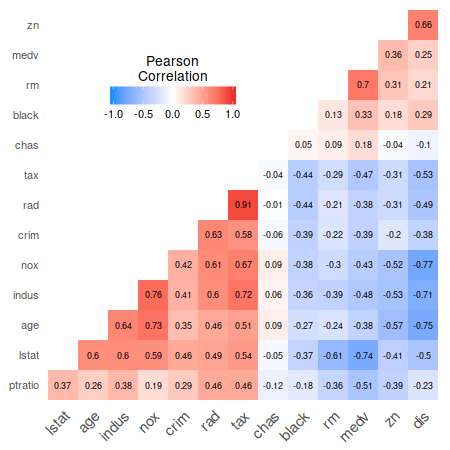

In [31]:
# Adapted from http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
options(repr.plot.width = 5, repr.plot.height = 5)

get.upper.tri <- function(mat) {
    mat[upper.tri(mat)] <- NA
    diag(mat) <- NA
    mat
}

# Use correlation between variables as distance
reorder.corr <- function(mat){
    dd <- as.dist((1 - mat) / 2)
    hc <- hclust(dd)
    cormat <- mat[hc$order, hc$order]
}

corr <- round(cor(Boston), 2)
corr <- reorder.corr(corr)
corr <- get.upper.tri(corr)
corr <- melt(corr, na.rm = TRUE)

ggplot(data = corr, aes(x = Var1, y = Var2, fill = value, label = value)) + 
    geom_tile() + 
    scale_fill_gradient2(
        low = "dodgerblue", 
        high = "firebrick2", 
        mid = "white", 
        midpoint = 0, 
        limit = c(-1, 1), 
        space = "Lab",
        name = "Pearson\nCorrelation") + 
    theme(
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            size = 12, 
            hjust = 1)) + 
    coord_fixed() + 
    geom_text(size = 2.5) + 
    theme(
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        axis.ticks = element_blank(), 
        legend.justification = c(1, 0), 
        legend.position = c(0.5, 0.7), 
        legend.direction = "horizontal") + 
    guides(
        fill = guide_colorbar(
            barwidth = 7, 
            barheight = 1, 
            title.position = "top", 
            title.hjust = 0.5))

#### Exercise 10d

Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil–teacher ratios? Comment on
the range of each predictor.

##### High crime rates


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



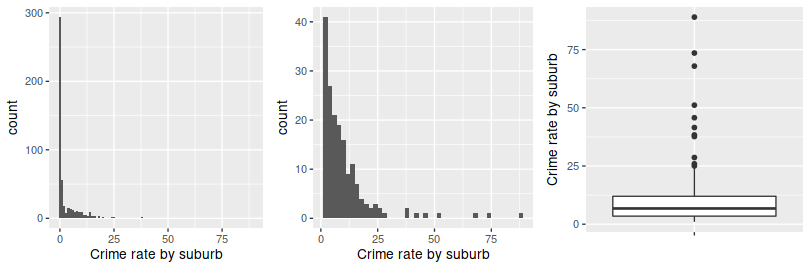

In [32]:
library("gridExtra")

options(repr.plot.width = 9, repr.plot.height = 3)

large.crim <- Boston[Boston$crim > 1, ]

# Plot all values
p1 <- ggplot(Boston, aes(crim)) + geom_histogram(binwidth = 1) +
    xlab("Crime rate by suburb")
# Plot only crime rates above 1
p2 <- ggplot(large.crim, aes(crim)) +  geom_histogram(binwidth = 2) +
    xlab("Crime rate by suburb")
p3 <- ggplot(large.crim, aes(x = "", y = crim)) + geom_boxplot() +
    xlab("") +
    ylab("Crime rate by suburb")

grid.arrange(p1, p2, p3, ncol = 3)

The suburds that seem to have high crime rates far higher than the others 
are those which the crime rate exceeds 25%:

In [33]:
which(Boston$crim > 25)

[1] 381 399 401 405 406 411 414 415 418 419 428

##### Tax rates

In [34]:
table(Boston$tax)


187 188 193 198 216 222 223 224 226 233 241 242 243 244 245 247 252 254 255 256 
  1   7   8   1   5   7   5  10   1   9   1   2   4   1   3   4   2   5   1   1 
264 265 270 273 276 277 279 280 281 284 285 287 289 293 296 300 304 305 307 311 
 12   2   7   5   9  11   4   1   4   7   1   8   5   3   8   7  14   4  40   7 
313 315 329 330 334 335 337 345 348 351 352 358 370 384 391 398 402 403 411 422 
  1   2   6  10   2   2   2   3   2   1   2   3   2  11   8  12   2  30   2   1 
430 432 437 469 666 711 
  3   9  15   1 132   5 

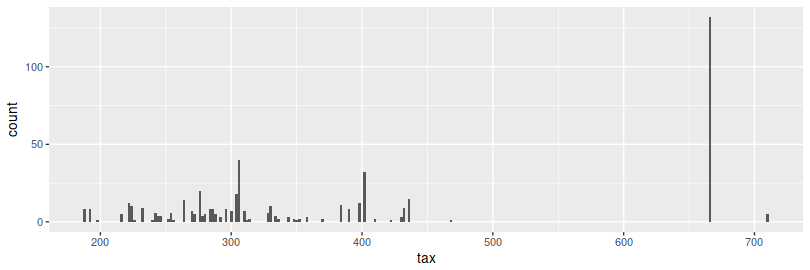

In [35]:
ggplot(Boston, aes(tax)) + geom_histogram(binwidth = 2)

Although 666 looked an outlier, there are a few tax vaues even higher, 711.
If actual values, they are quite high compared to the the rest.

##### Pupil–Teacher Ratio

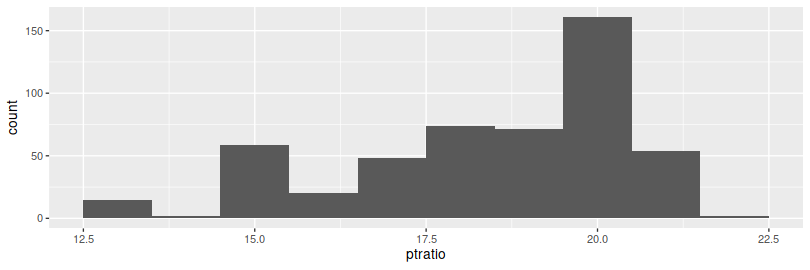

In [36]:
ggplot(Boston, aes(ptratio)) + geom_histogram(binwidth = 1)

Since 22.5 pupils for each teacher is acceptable, the pupil–teacher ratio looks 
without high ratios.

#### Exercise 10e

How many of the suburbs in this data set bound the Charles
river?

In [37]:
table(Boston$chas)


  0   1 
471  35 

#### Exercise 10f

What is the median pupil-teacher ratio among the towns in this data set?

In [38]:
median(Boston$ptratio)

[1] 19.05

#### Exercise 10g

Which suburb of Boston has lowest median value of owner-occupied homes? 
What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [39]:
lowest.suburb <- Boston[which.min(Boston$medv), ]
lowest.suburb

crim    zn indus chas nox   rm    age dis    rad tax ptratio black lstat
399 38.3518 0  18.1  0    0.693 5.453 100 1.4896 24  666 20.2    396.9 30.59
    medv
399 5

Let’s draw the histogram for each predictor with a red, dashed vertical line
marking the position of the surburb with lowest median housing value.

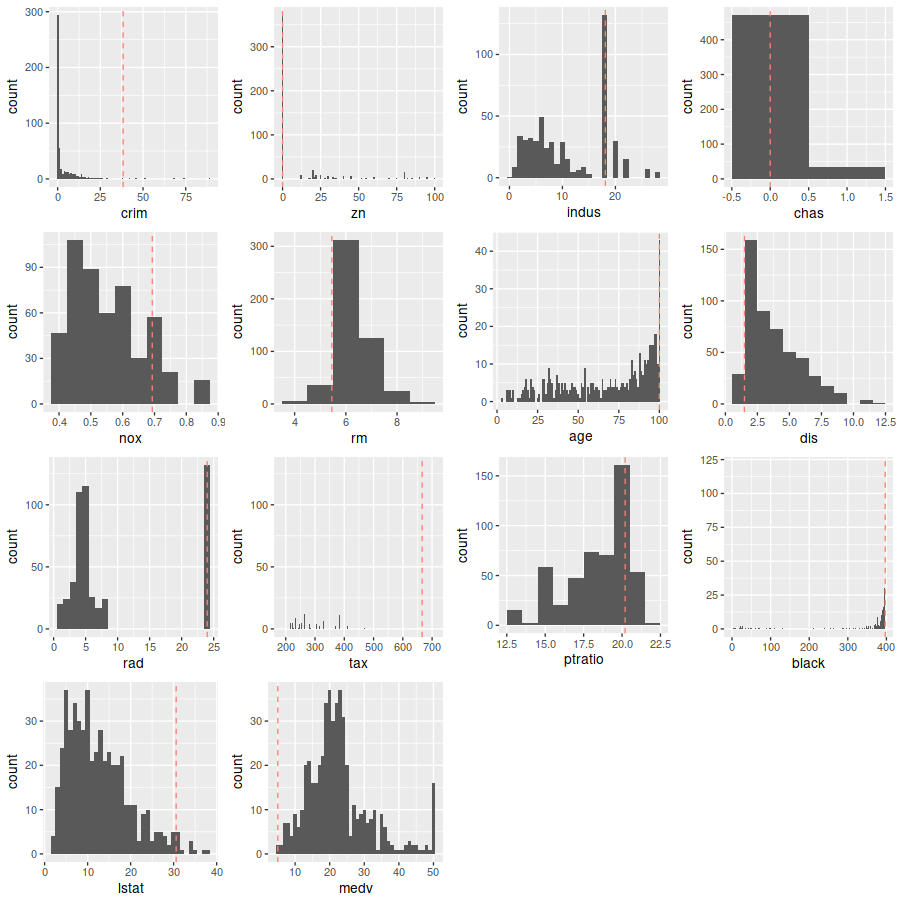

In [40]:
options(repr.plot.width = 10, repr.plot.height = 10)

plots <- list()
for (pred in colnames(Boston)) {
    bin.width <- 1
    if (pred %in% c("nox")) bin.width <- 0.05
    p <- ggplot(Boston, aes_string(x = pred)) + 
        geom_histogram(binwidth = bin.width) +
        geom_vline(xintercept = get(pred, lowest.suburb), 
                   linetype = "dashed", 
                   color = "salmon")
    plots <- c(plots, list(p))
}

do.call("grid.arrange", c(plots, ncol = 4))

This seems to be an old suburb of blacks that is not currently 
residential, with a high crime rate.

The tax rate seems to be placed quite high, but as we saw earlier, a **tax**
can actually be a missing value.

In [41]:
ecdf(Boston$nox)(lowest.suburb$nox)

[1] 0.8577075

Additionally, this could be an industrial area because the **nox** is located at the 86% percentile.

#### Exercise 10h

In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [42]:
rooms <- ceiling(Boston$rm)
table(rooms)

rooms
  4   5   6   7   8   9 
  2  14 157 269  51  13 

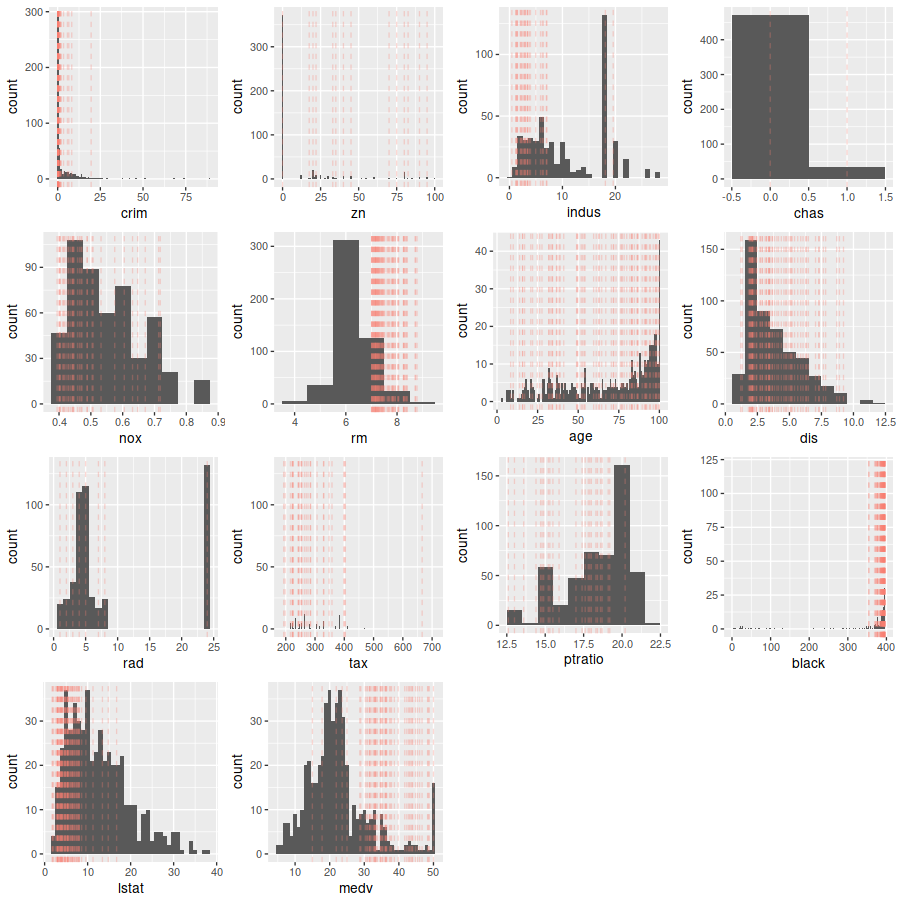

In [43]:
options(repr.plot.width = 10, repr.plot.height = 10)

plots <- list()
for (pred in colnames(Boston)) {
    bin.width <- 1
    if (pred %in% c("nox")) bin.width <- 0.05
    p <- ggplot(Boston, aes_string(x = pred)) + 
        geom_histogram(binwidth = bin.width) +
        geom_vline(xintercept = get(pred, Boston[which(rooms > 7), ]),
                   linetype = "dashed", 
                   color = "salmon",
                   alpha = 0.3)
    plots <- c(plots, list(p))
}

do.call("grid.arrange", c(plots, ncol = 4))

These refer to suburbs with the largest and most expensive houses.